# Data and Imports

In [122]:
# !/usr/bin/python3 -m pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# Constants
Wing_SA = 41.8
mean_chord = 2.08
g = 9.80665
empty_weight = 8695 # kg
rho0 = 1.225
P0 = 101325
T0 = 288.15

kt_to_ms = 0.514444
ft_to_m = 0.3048


seat_dist = np.array([
    6.91,  # demo seat
    7.87,
    8.61,
    9.34,
    10.08,
    10.82,
    11.73,
    12.49,
    13.23,
    13.96,
    14.7,
    15.49,
    17.12, # balast box
])

A_weight = np.array([
    [76 , 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [47,48,	53],
    [54,64,	65],
    [65,65,	65],
    [69,70,	70],
    [57,70,	74],
    [74,75,	78],
    
    [80,58,	85],
    [90,90,	100],
    [200, 0, 0],
])

B_weight = np.array([
    [76, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [95, 85, 85],
    [85, 84, 82],
    [80, 80, 79],
    [79, 78, 76],
    [76, 74, 70],
    [70, 65, 65],
    [63, 60, 60],
    [58, 56, 53],
    [0, 0, 0],
    [200, 0, 0],
])

mean_fuel_dist = 11.18
moment_aircraft = empty_weight * 10.69

A_moment_base = np.sum(np.sum(A_weight, axis=1) * seat_dist[:]) + moment_aircraft
B_moment_base = np.sum(np.sum(B_weight, axis=1) * seat_dist[:]) + moment_aircraft

A_weight_total_empty = np.sum(A_weight) + empty_weight
B_weight_total_empty = np.sum(B_weight) + empty_weight

taskA_mean_fuel_A = 1903.02924
taskA_mean_fuel_B = 1566.53462

A_data_LSS = np.array([
    # speed(kt), Elev deflection, Elev tab angle
    [160.48440,	    -0.43095,     0.73480],
    [170.78120,	    -0.04865,     0.50430],
    [181.25000,	    0.24780,      0.32060],
    [190.59370,	    0.78565,      0.00050],
    [199.10940,	    0.99695,      -0.20530],
])

B_data_LSS = np.array([
    # speed(kt), Elev deflection, Elev tab angle
    [160.29690,	    -2.73140,   	1.83740],
    [170.00000,	    -2.07820,   	1.44810],
    [180.42190,	    -1.47365,   	1.08130],
    [190.25000,	    -1.05365,   	0.75290],
    [200.84370,	    -0.53645,   	0.42000],
])

taskB_mean_fuel_A = 1873.27494
taskB_mean_fuel_B = 1538.49496

A_data_LMS = np.array([
    # Elev deflection,	Ph,	(n+1)g
    [ 0.20255,     -65.30200,     1.04360],
    [-0.68075,     -16.82440,     1.12240],
    [-1.18660,      23.43460,     1.19220],
    [-2.98120,     146.03230,     1.43420],
    [-5.05180,     245.93120,     1.94960],
])

B_data_LMS = np.array([
    # Elev deflection,	Ph,	(n+1)g
    [-1.55330,  	32.74210,     1.00080],
    [-2.76635,  	109.85710,  	1.17560],
    [-3.66795,  	153.77440,  	1.23740],
    [-5.79670,  	302.09980,  	1.67520],
    [-7.34680,  	408.26040,  	1.96960],
])

# Clean
A_data_LDSS = np.array([
    # Aileron [°]	Roll angle [°]	Sideslip [°]	Rudder [°]
    [-7.2759,	 4.8093,	    5.5995,	    8.1628],
    [-5.6255,	 3.3133,	    4.6952,	    6.4218],
    [-3.4306,	 4.0008,	    3.2835,	    4.4967],
    [-1.0621,	 0.5966,	    0.5047,	    0.8832],
    [ 2.8667,	-0.9578,	   -3.1748,    -3.3530],
    [ 4.2400,	-2.4941,	   -4.5702,    -5.3966],
    [ 5.8747,	-4.0289,	   -5.9614,    -7.2580],
])

# Gear Down
B_data_LDSS = np.array([
    # Aileron [°]	Roll angle [°]	Sideslip [°]	Rudder [°]
    [ 4.2178,  -5.2976,	   -5.8696,     -7.5276],
    [ 2.9049,  -3.4657,	   -4.4460,     -5.9139],
    [ 2.1719,  -4.0417,	   -3.2991,     -4.1758],
    [-0.6438,   0.9307,	    0.3093, 	 0.0465],
    [-1.7581,   2.8474,	    1.7881, 	 3.0123],
    [-2.7607,   3.8977,	    2.4290, 	 4.2390],
    [-3.5802,   4.6921,	    3.1829, 	 5.6289],
])


In [124]:
def cg(base_moment, weight, fuel):
    return (((base_moment + mean_fuel_dist * fuel) / (weight + fuel)) - 10.472)*(100/2.085)


# Longitudinal Static Stability

In [125]:
# @title Calculating CG and $C_w$
A_mass = A_weight_total_empty + taskA_mean_fuel_A
B_mass = B_weight_total_empty + taskA_mean_fuel_B
print(f"Aircraft A Mass : {A_mass:.2f} kg")
print(f"Aircraft B Mass : {B_mass:.2f} kg\n")

A_cg = cg(A_moment_base, A_weight_total_empty, taskA_mean_fuel_A)
B_cg = cg(B_moment_base, B_weight_total_empty, taskA_mean_fuel_B)

print(f"Aircraft A CG: {A_cg:.2f} %MAC")
print(f"Aircraft B CG: {B_cg:.2f} %MAC")

VeA = A_data_LSS[:, 0] * kt_to_ms
VeB = B_data_LSS[:, 0] * kt_to_ms

eta_A = A_data_LSS[:, 1]
eta_B = B_data_LSS[:, 1]

beta_A = A_data_LSS[:, 2]
beta_B = B_data_LSS[:, 2]

Cw_A = (2*A_mass*g)/(rho0*(VeA**2)*Wing_SA)
Cw_B = (2*B_mass*g)/(rho0*(VeB**2)*Wing_SA)

Aircraft A Mass : 12540.03 kg
Aircraft B Mass : 12295.53 kg

Aircraft A CG: 33.15 %MAC
Aircraft B CG: 24.89 %MAC


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Aircraft A: Gradient = -5.89
Aircraft B: Gradient = -8.62


Neutral point: 50.98 %MAC


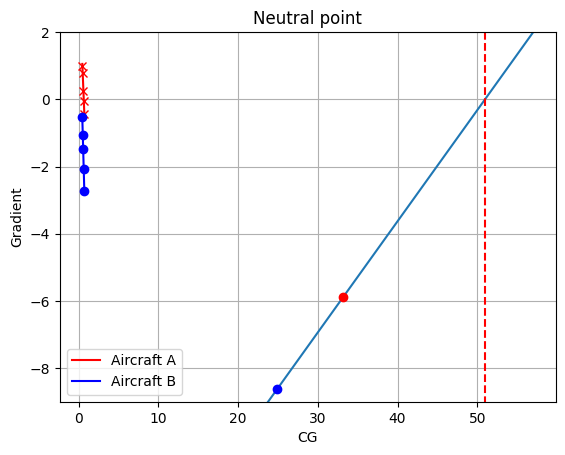

In [126]:
# @title Stick-Fixed
coef_A = np.polyfit(Cw_A, eta_A, 1)
coef_B = np.polyfit(Cw_B, eta_B, 1)

# cw_x = np.linspace(-0.15, 0.7, 100)
cw_x = np.linspace(max(Cw_A[0], Cw_B[0]), min(Cw_A[-1], Cw_B[-1]), 100)

fit_A = np.polyval(coef_A, cw_x)
fit_B = np.polyval(coef_B, cw_x)

plt.plot(Cw_A, eta_A, 'rx')
plt.plot(cw_x, fit_A, 'r-',label="Aircraft A")

plt.plot(Cw_B, eta_B, 'bo')
plt.plot(cw_x, fit_B, 'b-', label="Aircraft B")
plt.legend()
plt.title("LSS stick-fixed")
plt.xlabel("$C_w$")
plt.ylabel("$\eta$")
plt.savefig('img1.eps', format='eps')

print()
print(f"Aircraft A: Gradient = {coef_A[0]:.2f}")
print(f"Aircraft B: Gradient = {coef_B[0]:.2f}")
print()

neutral_point_coef = np.polyfit([coef_A[0], coef_B[0]], [A_cg, B_cg], 1)
y = np.linspace(-9, 2, 100)
x = np.polyval(neutral_point_coef, y)

plt.plot(x, y)
plt.plot([A_cg], [coef_A[0]], "ro")
plt.plot([B_cg], [coef_B[0]], "bo")
plt.vlines(np.polyval(neutral_point_coef, 0), 2, -9, "r", "--")
plt.title("Neutral point")
plt.xlabel("CG")
plt.ylabel("Gradient")
plt.ylim(-9, 2)
plt.grid()
plt.savefig('img2.eps', format='eps')

print(f"\nNeutral point: {np.polyval(neutral_point_coef, 0):.2f} %MAC")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Aircraft A: grad = 3.78
Aircraft B: grad = 5.60



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Neutral point: 50.29 %MAC


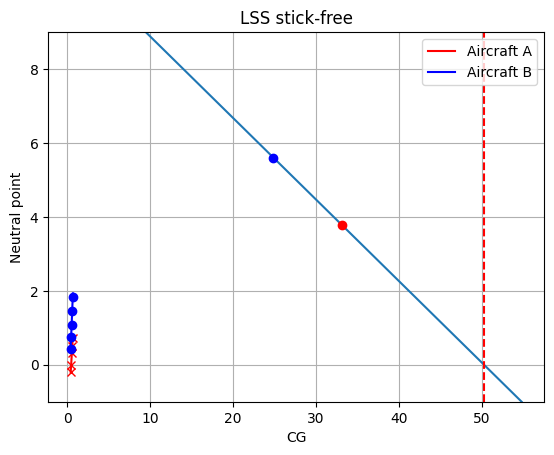

In [127]:
# @title Stick-Free

coef_A = np.polyfit(Cw_A, beta_A, 1)
coef_B = np.polyfit(Cw_B, beta_B, 1)

cw_x = np.linspace(max(Cw_A[0], Cw_B[0]), min(Cw_A[-1], Cw_B[-1]), 100)

fit_A_free = np.polyval(coef_A, cw_x)
fit_B_free = np.polyval(coef_B, cw_x)

plt.plot(Cw_A, beta_A, "rx")
plt.plot(cw_x, fit_A_free, "r-", label="Aircraft A")

plt.plot(Cw_B, beta_B, "bo")
plt.plot(cw_x, fit_B_free, "b-", label="Aircraft B")
plt.legend()
plt.title("LSS stick-free")
plt.xlabel("$C_w$")
plt.ylabel(r"$\beta$")
plt.savefig('img3.eps', format='eps')

print()
print(f"Aircraft A: grad = {coef_A[0]:.2f}")
print(f"Aircraft B: grad = {coef_B[0]:.2f}")
print()

neutral_point_coef = np.polyfit([coef_A[0], coef_B[0]], [A_cg, B_cg], 1)
y = np.linspace(-1, 9, 100)
x = np.polyval(neutral_point_coef, y)

plt.plot(x, y)
plt.plot([A_cg], [coef_A[0]], "ro")
plt.plot([B_cg], [coef_B[0]], "bo")
plt.vlines(np.polyval(neutral_point_coef, 0), -1, 9, "r", "--")
plt.xlabel("CG")
plt.ylabel("Gradient")
plt.ylabel("Neutral point")
plt.ylim(-1, 9)
plt.grid()
plt.savefig('img4.eps', format='eps')

print(f"\nNeutral point: {np.polyval(neutral_point_coef, 0):.2f} %MAC")

# Manoeuvre Stability

In [128]:
# @title  Calculating CG and $C_w$
A_mass = A_weight_total_empty + taskB_mean_fuel_A
B_mass = B_weight_total_empty + taskB_mean_fuel_B
print(f"Aircraft A Mass : {A_mass:.2f} kg")
print(f"Aircraft B Mass : {B_mass:.2f} kg\n")

A_cg = cg(A_moment_base, A_weight_total_empty, taskB_mean_fuel_A)
B_cg = cg(B_moment_base, B_weight_total_empty, taskB_mean_fuel_B)
print(f"Aircraft A CG : {A_cg:.2f} %MAC")
print(f"Aircraft B CG: {B_cg:.2f} %MAC")

eta_A = A_data_LMS[:, 0]
eta_B = B_data_LMS[:, 0]

Ph_A = A_data_LMS[:, 1]
Ph_B = B_data_LMS[:, 1]

g_A = A_data_LMS[:, 2]
g_B = B_data_LMS[:, 2]

eta_A -= eta_A[0]
eta_B -= eta_B[0]

# eta_A -= 6
# eta_B -= 6

# eta_A = -eta_A
# eta_B = -eta_B

# Ph_A = Ph_A
# Ph_B = Ph_B


g_A -= g_A[0]
g_B -= g_B[0]

Aircraft A Mass : 12510.27 kg
Aircraft B Mass : 12267.49 kg

Aircraft A CG : 33.15 %MAC
Aircraft B CG: 24.87 %MAC


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


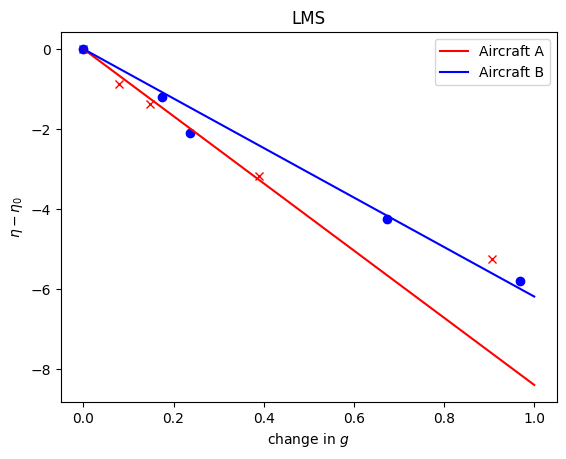


Manoeuvre point: 1.67 %MAC


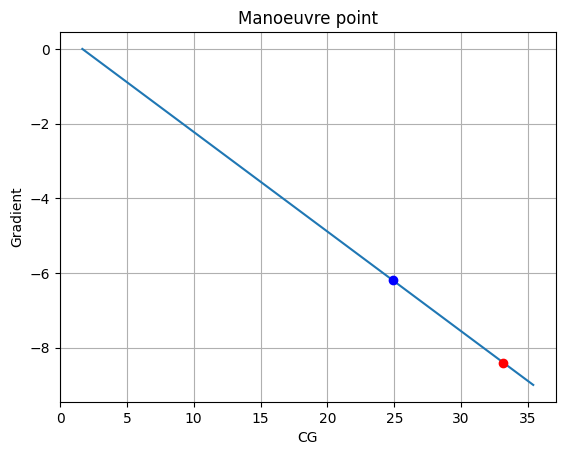

In [129]:
# @title  Stick-fixed

plt.plot(g_A, eta_A, "rx")
plt.plot(g_B, eta_B, "bo")

index = np.arange(0, g_B.size)
weight = np.ones(g_B.size-1)
weight[0] = 1000

coef_A = np.polyfit(g_A[:-1], eta_A[:-1], 1, w=weight)
coef_B = np.polyfit(g_B[index != 1], eta_B[index != 1], 1, w=weight)

g_x = np.linspace(0, 1, 100)

fit_A = np.polyval(coef_A, g_x)
fit_B = np.polyval(coef_B, g_x)

plt.plot(g_x, fit_A, "r-", label="Aircraft A")
plt.plot(g_x, fit_B, "b-", label="Aircraft B")
plt.legend()
plt.title("LMS")
plt.xlabel(r"change in $g$")
plt.ylabel("$\eta-\eta_0$")
plt.savefig('img5.eps', format='eps')
plt.show()

neutral_point_coef = np.polyfit([coef_A[0], coef_B[0]], [A_cg, B_cg], 1)
y = np.linspace(0, -9, 100)
x = np.polyval(neutral_point_coef, y)

plt.plot(x, y)
plt.plot([A_cg], [coef_A[0]], "ro")
plt.plot([B_cg], [coef_B[0]], "bo")
# plt.vlines(np.polyval(neutral_point_coef, 0), -1, 9, "r", "--")
plt.title("Manoeuvre point")
plt.xlabel("CG")
plt.ylabel("Gradient")
# plt.ylim(-1, 9)
plt.grid()
plt.savefig('img6.eps', format='eps')

print(f"\nManoeuvre point: {np.polyval(neutral_point_coef, 0):.2f} %MAC")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


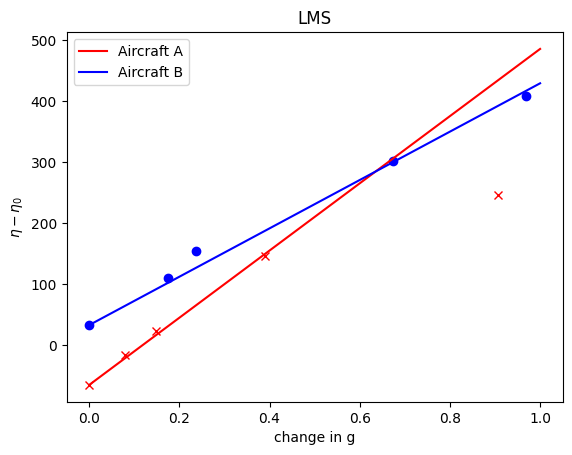


Manoeuvre point: 3.62 %MAC


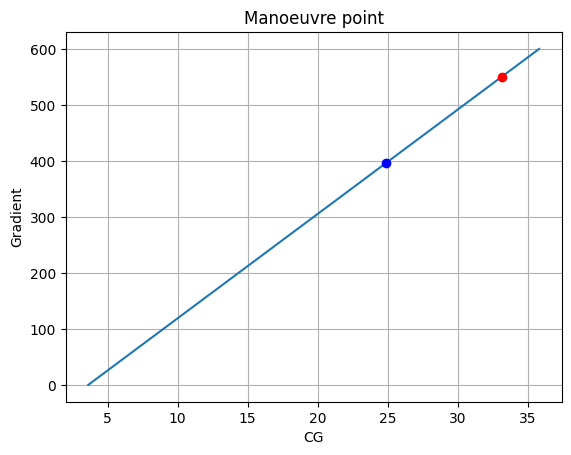

In [130]:
# @title  Stick-free

plt.plot(g_A, Ph_A, "rx")
plt.plot(g_B, Ph_B, "bo")

index = np.arange(0, g_B.size)
weight = np.ones(g_B.size-1)
weight[0] = 1000

coef_A = np.polyfit(g_A[:-1], Ph_A[:-1], 1, w=weight)
coef_B = np.polyfit(g_B[index != 1], Ph_B[index != 1], 1, w=weight)

# coef_A = np.polyfit(g_A, Ph_A, 1, w=weight)
# coef_B = np.polyfit(g_B, Ph_B, 1, w=weight)

g_x = np.linspace(0, 1, 100)

fit_A = np.polyval(coef_A, g_x)
fit_B = np.polyval(coef_B, g_x)

plt.plot(g_x, fit_A, "r-", label="Aircraft A")
plt.plot(g_x, fit_B, "b-", label="Aircraft B")
plt.legend()
plt.title("LMS")
plt.xlabel(r"change in g")
plt.ylabel("$\eta-\eta_0$")
plt.savefig('img7.eps', format='eps')
plt.show()


neutral_point_coef = np.polyfit([coef_A[0], coef_B[0]], [A_cg, B_cg], 1)
y = np.linspace(0, 600, 100)
x = np.polyval(neutral_point_coef, y)

plt.plot(x, y)
plt.plot([A_cg], [coef_A[0]], "ro")
plt.plot([B_cg], [coef_B[0]], "bo")
# plt.vlines(np.polyval(neutral_point_coef, 0), -1, 9, "r", "--")
plt.title("Manoeuvre point")
plt.xlabel("CG")
plt.ylabel("Gradient")
# plt.ylim(-1, 9)
plt.grid()
plt.savefig('img8.eps', format='eps')

print(f"\nManoeuvre point: {np.polyval(neutral_point_coef, 0):.2f} %MAC")

# Lateral-Directional Static Stability

In [131]:
# @title Sideforce chrateristics
side_slip_A = A_data_LDSS[:, 2]
side_slip_B = B_data_LDSS[:, 2]

roll_angle_A = A_data_LDSS[:, 1]
roll_angle_B = B_data_LDSS[:, 1]

rudder_A = A_data_LDSS[:, 3]
rudder_B = B_data_LDSS[:, 3]

Aileron_A = A_data_LDSS[:, 0]
Aileron_B = B_data_LDSS[:, 0]

def plot_graph(arr_A, arr_B, label, title):
    roll_angle_A =arr_A
    roll_angle_B =arr_B
    plt.plot(side_slip_A, roll_angle_A, 'rx')
    plt.plot(side_slip_B, roll_angle_B, 'bo')

    coef_A = np.polyfit(side_slip_A, roll_angle_A, 1)
    coef_B = np.polyfit(side_slip_B, roll_angle_B, 1)

    x = np.linspace(max(side_slip_A[0], side_slip_B[0]), min(side_slip_A[-1], side_slip_B[-1]), 100)
    y_A = np.polyval(coef_A, x)
    y_B = np.polyval(coef_B, x)

    side_slip_limit = np.arcsin(30/(140*kt_to_ms))*(180/np.pi)
    print(f"Side slip limit = {side_slip_limit:.2f} or (15deg)")

    plt.plot(x, y_A, 'r-', label="140kt Clean")
    plt.plot(x, y_B, 'b-', label="140kt Gear down + FLP20")

    # plt.vlines(side_slip_limit, -10, 10)
    # plt.vlines(-side_slip_limit, -10, 10)

    plt.legend()
    plt.title(title)
    plt.xlabel("Sideslip [°]")
    plt.ylabel(f"{label} [°]")
    plt.legend()
    plt.grid()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Side slip limit = 24.62 or (15deg)


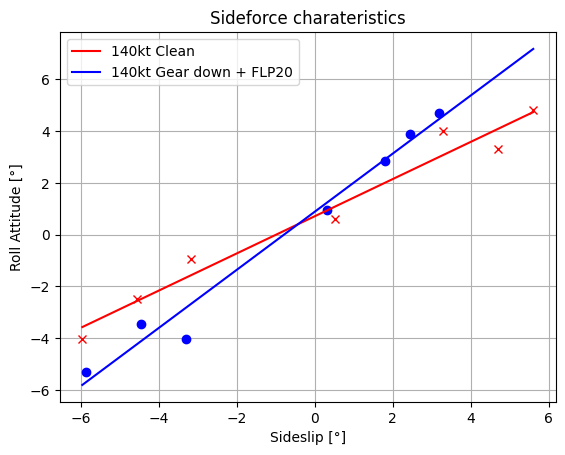

In [132]:
plot_graph(roll_angle_A, roll_angle_B, "Roll Attitude" ,"Sideforce charateristics")
plt.savefig('img9.eps', format='eps')

Side slip limit = 24.62 or (15deg)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


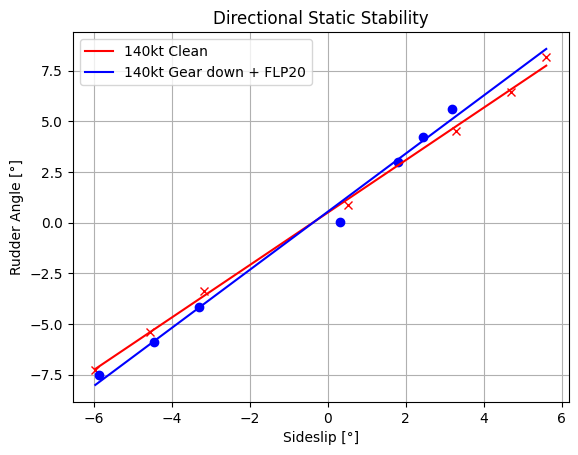

In [133]:
plot_graph(rudder_A, rudder_B,  "Rudder Angle", "Directional Static Stability")
plt.savefig('img10.eps', format='eps')

Side slip limit = 24.62 or (15deg)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


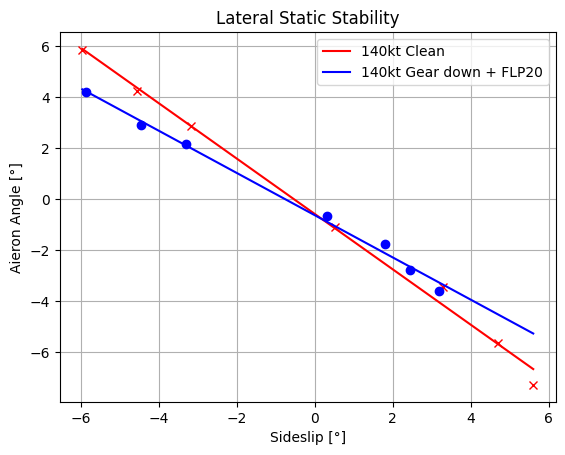

In [134]:
plot_graph(Aileron_A, Aileron_B, "Aieron Angle", "Lateral Static Stability")
plt.savefig('img11.eps', format='eps')
